In [51]:
import pandas as pd
import numpy as np
import scipy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Part 1 : Data Exploration

In [52]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PCAmusique_project/music_dataset_mod.csv')

In [53]:
df.head()

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country


 we create a copy of this DataFrame using the copy() method. This ensures that any changes we make won't affect the original dataset.

In [54]:
df_music_real = df.copy()
df_music_real

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,66.578839,54.533872,99.782246,95.633310,91.414514,19.396142,36.280860,78.298955,4.890606,4.638077,75.479656,95.990077,NaN
996,126.570862,57.812829,90.809940,64.880583,40.437517,38.051344,66.204244,95.770959,1.745673,6.729019,82.042218,43.590027,Classical
997,121.731543,51.385204,33.849400,17.044544,84.483481,13.312790,8.953013,64.068960,90.738580,96.043437,5.499350,74.604889,Rock
998,97.070804,19.210429,62.662860,22.720453,66.917937,80.590809,51.403310,50.828636,68.518232,55.119045,21.781372,24.716517,Rock


In [55]:
df_music_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tempo                        1000 non-null   float64
 1   Dynamics Range               1000 non-null   float64
 2   Vocal Presence               1000 non-null   float64
 3   Percussion Strength          1000 non-null   float64
 4   String Instrument Detection  1000 non-null   float64
 5   Electronic Element Presence  1000 non-null   float64
 6   Rhythm Complexity            1000 non-null   float64
 7   Drums Influence              1000 non-null   float64
 8   Distorted Guitar             1000 non-null   float64
 9   Metal Frequencies            1000 non-null   float64
 10  Ambient Sound Influence      1000 non-null   float64
 11  Instrumental Overlaps        1000 non-null   float64
 12  Genre                        890 non-null    object 
dtypes: float64(12), obj

detect various music styles

In [56]:
df_music_real['Genre'].unique()

array(['Country', 'Classical', 'Rock', 'Hip-hop', nan, 'Jazz'],
      dtype=object)

visualization of the distribution in the dataset's Genre column.

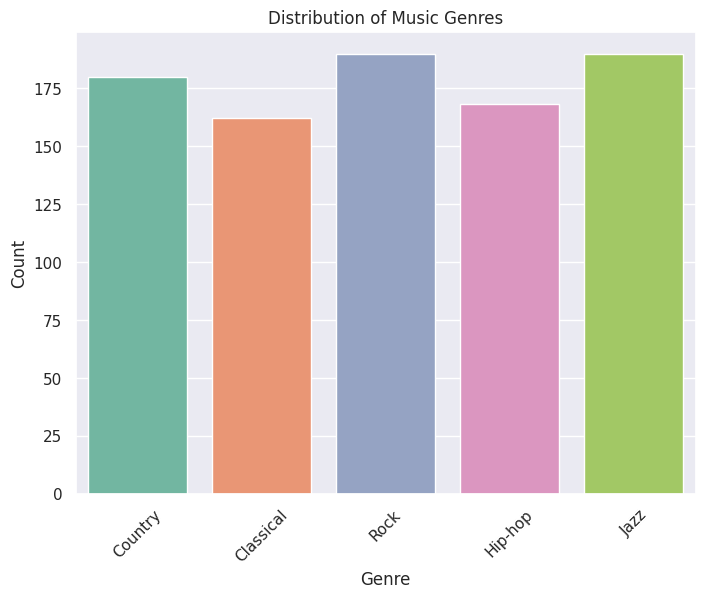

In [57]:
unique_genres = df_music_real['Genre'].nunique()

palette = sns.color_palette("Set2", n_colors=unique_genres)

plt.figure(figsize=(8, 6))
sns.countplot(x='Genre', data=df_music_real, hue='Genre', palette=palette, legend=False)
plt.title('Distribution of Music Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Part 2 : Correlation Analysis


In [58]:
#dealling with messing values

df_music_real_nonull = df_music_real.dropna()
df_music_real_nonull

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country
...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,133.807084,43.093084,88.711355,38.195402,25.365896,87.613700,74.603838,87.775499,28.055663,19.389458,74.576379,59.205448,Hip-hop
996,126.570862,57.812829,90.809940,64.880583,40.437517,38.051344,66.204244,95.770959,1.745673,6.729019,82.042218,43.590027,Classical
997,121.731543,51.385204,33.849400,17.044544,84.483481,13.312790,8.953013,64.068960,90.738580,96.043437,5.499350,74.604889,Rock
998,97.070804,19.210429,62.662860,22.720453,66.917937,80.590809,51.403310,50.828636,68.518232,55.119045,21.781372,24.716517,Rock


defining features and the target

In [59]:
X = df_music_real_nonull.drop(columns=['Genre'])
y = df_music_real_nonull['Genre']

converting the categorical Genre values into numerical form.

In [60]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [61]:
df_with_encoded_genre = df_music_real_nonull.copy()
df_with_encoded_genre.drop(columns=['Genre'], inplace=True)
df_with_encoded_genre['Genre_encoded'] = y_encoded

Generate a correlation matrix for the modified DataFrame using the corr() method. To visually represent this matrix, use seaborn's heatmap() function. For optimal display, set appropriate dimensions and parameters for the heatmap graph as follows:

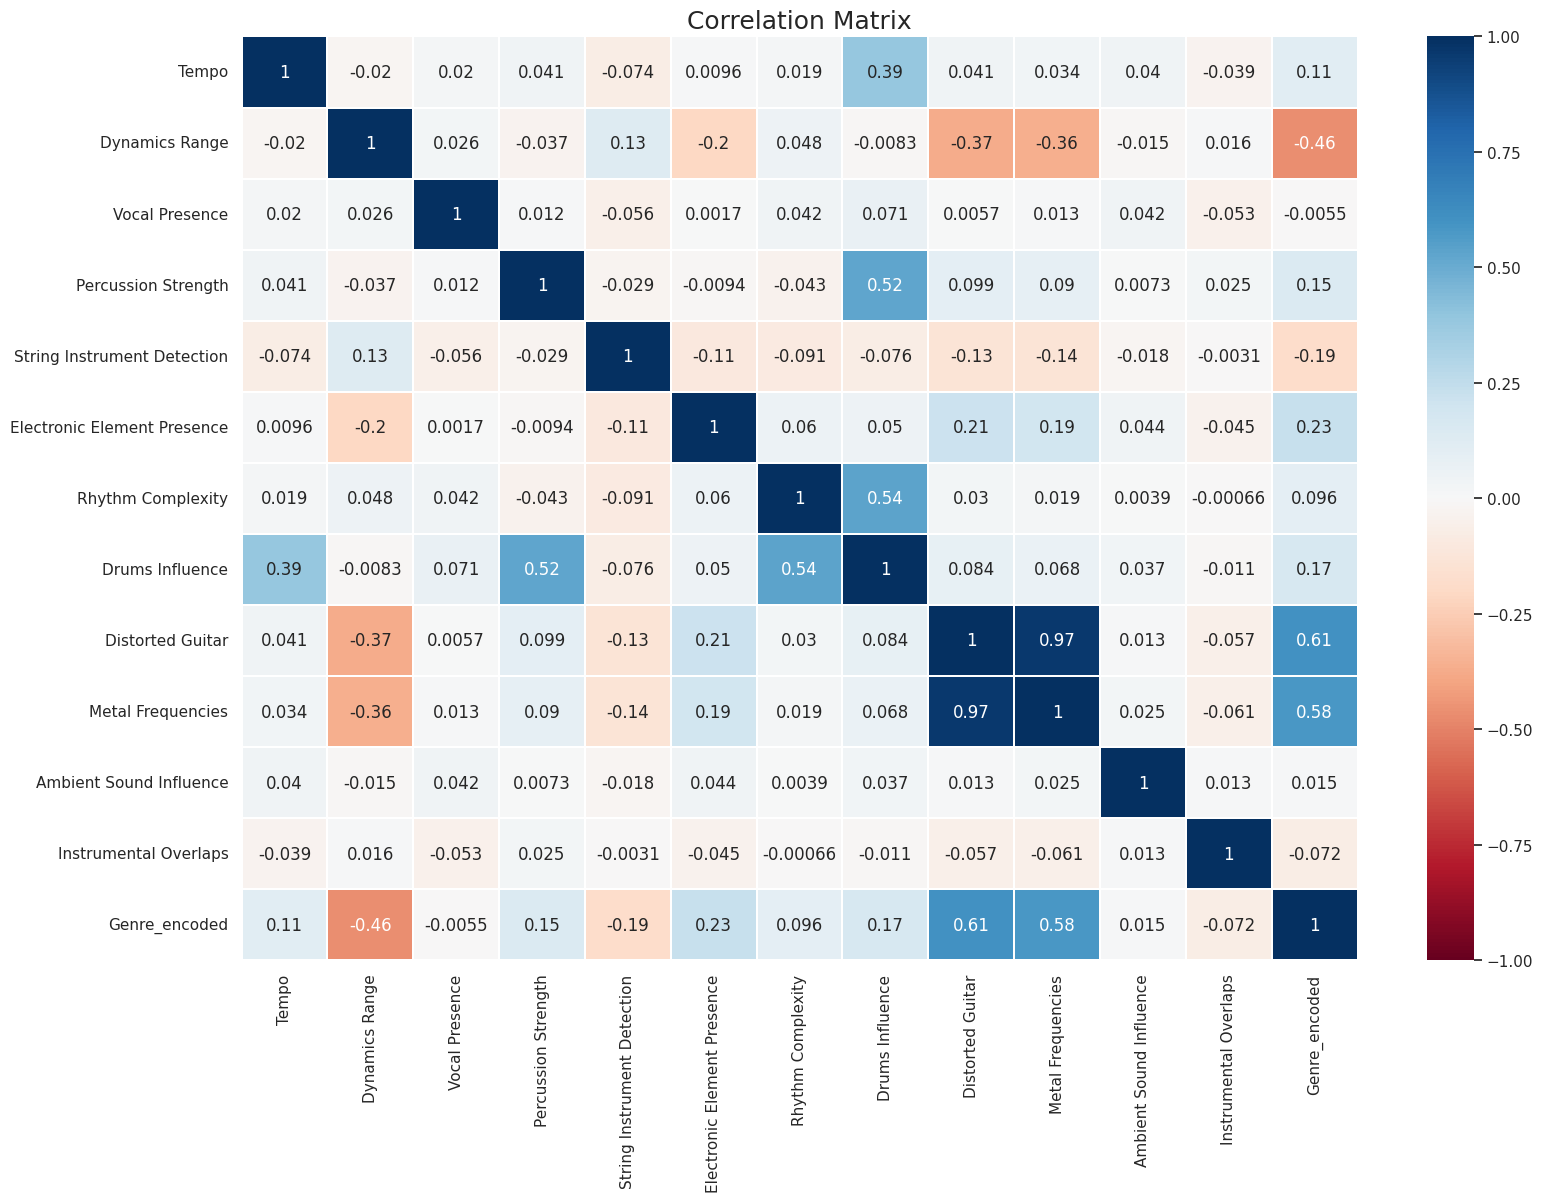

In [62]:
correlation_matrix = df_with_encoded_genre.corr()
plt.figure(figsize=(18, 12))

sns.heatmap(correlation_matrix,
            vmin=-1,
            vmax=1,
            annot=True,
            cmap="RdBu",
            linewidths=0.1)
plt.title("Correlation Matrix", fontsize=18)
plt.yticks(rotation=0)

plt.show()

# Part 3: PCA for Dimensionality Reduction

we used the StandardScaler() from sklearn to standardize our data. Applying the fit_transform() method and storing the standardized features in a variable called X_scaled.

In [63]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Implement PCA without specifying the number of components initially. This way, we will obtain the same number of components as the number of features.

In [64]:
pca = PCA()

In [65]:
#Fit the transformed X_scaled data into the PCA() model

X_pca = pca.fit_transform(X_scaled)

In [66]:
#Calculate the explained variance ratio for each component

explained_variance = pca.explained_variance_ratio_

Visualizing the explained variance against the number of principal components to determine how many we will use for the model. Display the cumulative variance with the cumsum() method.

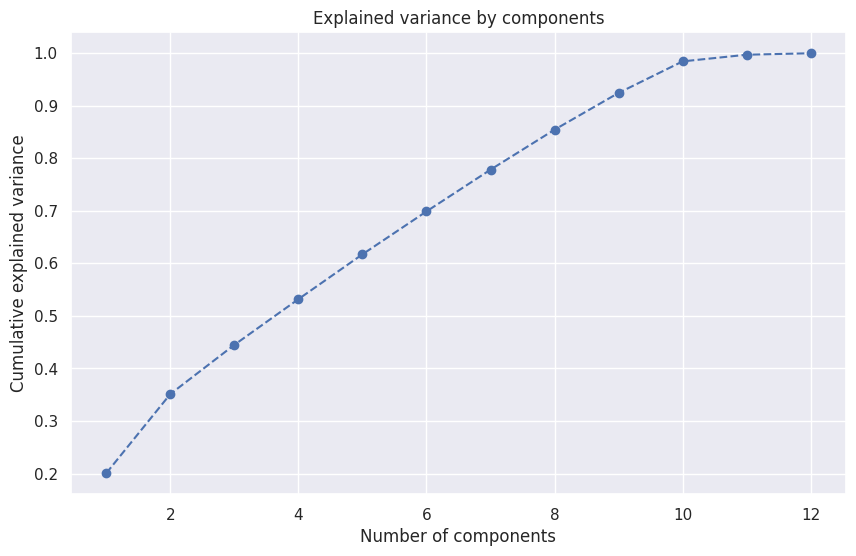

In [67]:
plt.figure(figsize=(10,6))
plt.plot(range(1,13),explained_variance.cumsum(),marker='o', linestyle='--')
plt.title('Explained variance by components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

Conduct feature selection by retaining enough components to capture at least 80% of the dataset's variance. According to the graph, selecting eight components will likely achieve this goal. Using the elbow method we gonna choose 8 components

In [68]:
pca = PCA(n_components=8)
X_pca = pca.fit_transform(X_scaled)

# Part 4: Evaluating Classification Efficacy – PCA-Transformed vs. Original Data

In [69]:
#splitting data into test and train
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_encoded, test_size=0.3, random_state=42)

Employ a Logistic Regression model with an increased iteration limit (e.g., max_iter=10000)

In [70]:
classifier = LogisticRegression(max_iter=10000)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

here we are using the Logistic Regression model we trained to make predictions on our test set. Afterward, we are assessing the model’s accuracy by applying the accuracy_score() method. Producing a classification report with the classification_report() function to comprehensively evaluate the model's performance.

In [71]:
y_pred = classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.5355805243445693

Classification Report:
               precision    recall  f1-score   support

   Classical       0.89      0.98      0.93        51
     Country       0.32      0.23      0.27        52
     Hip-hop       0.49      0.44      0.46        48
        Jazz       0.41      0.42      0.42        62
        Rock       0.51      0.63      0.56        54

    accuracy                           0.54       267
   macro avg       0.52      0.54      0.53       267
weighted avg       0.52      0.54      0.52       267



# Logistic regressio without PCA

Now we gonna carry out the same procedure with the original dataset that PCA hasn't modified.

In [80]:
# Split the original (non-PCA) data into training and test sets
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

In [81]:
# Train a Logistic Regression model using original features
logreg_orig = LogisticRegression(max_iter=10000)
logreg_orig.fit(X_train_orig, y_train_orig)

LogisticRegression(max_iter=10000)

In [82]:
# Predict and evaluate the model with original features
y_pred_orig = logreg_orig.predict(X_test_orig)
print("Accuracy with Original Features:", accuracy_score(y_test_orig, y_pred_orig))
print("\nClassification Report with Original Features:\n", classification_report(y_test_orig, y_pred_orig, target_names=le.classes_))

Accuracy with Original Features: 0.5318352059925093

Classification Report with Original Features:
               precision    recall  f1-score   support

   Classical       0.86      1.00      0.93        51
     Country       0.33      0.25      0.29        52
     Hip-hop       0.45      0.46      0.45        48
        Jazz       0.44      0.39      0.41        62
        Rock       0.49      0.59      0.54        54

    accuracy                           0.53       267
   macro avg       0.52      0.54      0.52       267
weighted avg       0.51      0.53      0.52       267



As we can see a big difference when using PCA and without it in terms of accuracy and the classification report

# Part 5: Genre Prediction and Integration

Now we are going to Locate and separate the rows in our original DataFrame that lack Genre information. we will Store the result in a new DataFrame called df_unknown_genre.

In [74]:
df_unknown_genre = df_music_real[df_music_real['Genre'].isnull()]

In [75]:
#Eliminate the Genre column from this identified subset of data.
X_unknown = df_unknown_genre.drop(columns=['Genre'])

Applying the essential transformations, which include scaling the data to standardize it and transforming it using PCA to match the format we utilized during the model training phase. This step ensures that the data is in the appropriate format and state for effective model application, mirroring the conditions under which the model was initially trained.

In [76]:
X_unknown_scaled = scaler.transform(X_unknown)
X_unknown_pca = pca.transform(X_unknown_scaled)

In [77]:
#prediction

y_unknown_pred = classifier.predict(X_unknown_pca)

In [78]:
#Apply LabelEncoder.inverse_transform() to transform the numerical predictions into their corresponding original genre labels.
df_unknown_genre.loc[:, 'Predicted_Genre'] = le.inverse_transform(y_unknown_pred)



<ipython-input-78-7dede4e073c9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unknown_genre.loc[:, 'Predicted_Genre'] = le.inverse_transform(y_unknown_pred)


In [79]:
print(df_unknown_genre[['Predicted_Genre']])

    Predicted_Genre
13        Classical
18          Country
22          Country
31             Rock
42             Rock
..              ...
991         Hip-hop
992            Rock
993         Hip-hop
994         Hip-hop
995       Classical

[110 rows x 1 columns]
